https://www.kaggle.com/stevezhenghp/airbnb-price-prediction (Regression)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
price = pd.read_csv("C:/Users/sanja/Desktop/my files/airbnb.csv")

In [4]:
price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 29 columns):
id                        74111 non-null int64
log_price                 74111 non-null float64
property_type             74111 non-null object
room_type                 74111 non-null object
amenities                 74111 non-null object
accommodates              74111 non-null int64
bathrooms                 73911 non-null float64
bed_type                  74111 non-null object
cancellation_policy       74111 non-null object
cleaning_fee              74111 non-null bool
city                      74111 non-null object
description               74111 non-null object
first_review              58247 non-null object
host_has_profile_pic      73923 non-null object
host_identity_verified    73923 non-null object
host_response_rate        55812 non-null object
host_since                73923 non-null object
instant_bookable          74111 non-null object
last_review               582

In [5]:
price['neighbourhood'].value_counts()

Williamsburg                           2862
Bedford-Stuyvesant                     2166
Bushwick                               1601
Upper West Side                        1396
Mid-Wilshire                           1392
Harlem                                 1374
Hollywood                              1321
Hell's Kitchen                         1299
Venice                                 1222
Upper East Side                        1206
Crown Heights                          1076
Astoria                                 898
Lower East Side                         833
East Village                            814
East Harlem                             793
Mission District                        784
West Hollywood                          729
Chelsea                                 726
Greenpoint                              725
Washington Heights                      722
Hamilton Heights                        628
Alphabet City                           619
Clinton Hill                    

We are dropping the following attributes:
1. Id = the column contains unique Id
2. amenities : 90% of the apartments are having same amenities.
3. description: This column contains content which needs some other programing techniques.
4. First review, host since, last review = these are all dates which are almost unique
5. host_has_profile_pic = 99% of the data holds the value as true.
6. latitude, longitude, zipcode = It defines the city or the place where the apartment is and we have already considered city attribute for the same.
7. Name = it holds unique apartments name.
8. thumbnail_url = site url
9. neighbourhood = It is an imporatant feature to be considered but there are unique values which was increasing the number of features and was making the models more complex. The other way was to group the neighbourhood area as per the location but we are not aware how to do it without using externel tools, hence we decided to drop the feature.

In [6]:
price.drop(['id', 'amenities', 'description', 'first_review', 'host_has_profile_pic', 'host_since', 'last_review', 'latitude', 'longitude', 'name', 'neighbourhood', 'thumbnail_url', 'zipcode'], axis=1,inplace= True)

In [7]:
price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 16 columns):
log_price                 74111 non-null float64
property_type             74111 non-null object
room_type                 74111 non-null object
accommodates              74111 non-null int64
bathrooms                 73911 non-null float64
bed_type                  74111 non-null object
cancellation_policy       74111 non-null object
cleaning_fee              74111 non-null bool
city                      74111 non-null object
host_identity_verified    73923 non-null object
host_response_rate        55812 non-null object
instant_bookable          74111 non-null object
number_of_reviews         74111 non-null int64
review_scores_rating      57389 non-null float64
bedrooms                  74020 non-null float64
beds                      73980 non-null float64
dtypes: bool(1), float64(5), int64(2), object(8)
memory usage: 8.6+ MB


In [8]:
price.isnull().sum()

log_price                     0
property_type                 0
room_type                     0
accommodates                  0
bathrooms                   200
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
host_identity_verified      188
host_response_rate        18299
instant_bookable              0
number_of_reviews             0
review_scores_rating      16722
bedrooms                     91
beds                        131
dtype: int64

In [9]:
price.describe()

,log_price,accommodates,bathrooms,number_of_reviews,review_scores_rating,bedrooms,beds
count,74111.000000,74111.000000,73911.000000,74111.000000,57389.000000,74020.000000,73980.000000
mean,4.782069,3.155146,1.235263,20.900568,94.067365,1.265793,1.710868
std,0.717394,2.153589,0.582044,37.828641,7.836556,0.852143,1.254142
min,0.000000,1.000000,0.000000,0.000000,20.000000,0.000000,0.000000
25%,4.317488,2.000000,1.000000,1.000000,92.000000,1.000000,1.000000
50%,4.709530,2.000000,1.000000,6.000000,96.000000,1.000000,1.000000
75%,5.220356,4.000000,1.000000,23.000000,100.000000,1.000000,2.000000
max,7.600402,16.000000,8.000000,605.000000,100.000000,10.000000,18.000000


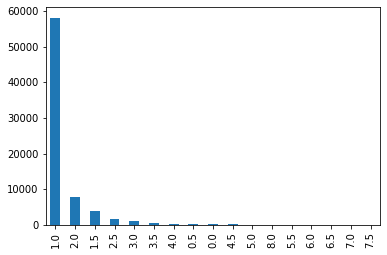

In [10]:
price['bathrooms'].value_counts().plot(kind='bar')

In [11]:
price['bathrooms'].fillna(1, inplace = True) 

As the mode of the column is 1  and only 0.27% of the data is missing.

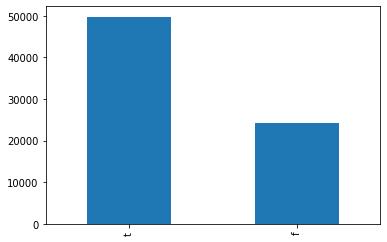

In [12]:
price['host_identity_verified'].value_counts().plot(kind='bar')

In [13]:
price['host_identity_verified'].fillna('t', inplace = True) 

As the mode of the column is true  and only 0.25% of the data is missing.

In [14]:
review = price[['review_scores_rating', 'number_of_reviews']].fillna('null')
rating = review[['review_scores_rating', 'number_of_reviews']].where(review['review_scores_rating'] == 'null')
review_rating = rating.loc[rating['review_scores_rating'] == 'null']
review_rating

,review_scores_rating,number_of_reviews
3,null,0.0
12,null,0.0
15,null,0.0
24,null,0.0
31,null,0.0
34,null,1.0
40,null,0.0
41,null,0.0
45,null,0.0
46,null,1.0


In [15]:
review_rating['number_of_reviews'].value_counts()

0.0      15819
1.0        746
2.0         86
3.0         26
4.0         10
5.0          5
8.0          4
15.0         3
28.0         2
23.0         2
33.0         1
25.0         1
18.0         1
21.0         1
6.0          1
7.0          1
10.0         1
32.0         1
13.0         1
43.0         1
47.0         1
101.0        1
36.0         1
17.0         1
9.0          1
37.0         1
19.0         1
63.0         1
131.0        1
Name: number_of_reviews, dtype: int64

In [16]:
price['review_scores_rating'].fillna(0, inplace = True)
#for the null values the no. of reviews are 0 or 1 which implies that the scores will be 0

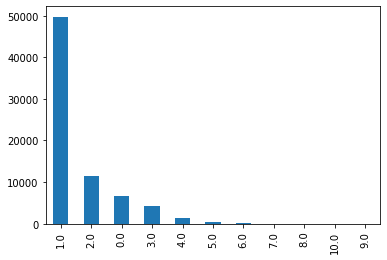

In [17]:
price['bedrooms'].value_counts().plot(kind='bar')

In [18]:
price['bedrooms'].fillna(1, inplace = True) # as the mode of the column is 1  and only 0.12% of the data is missing

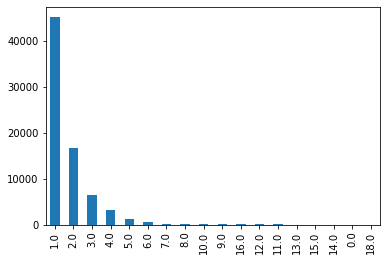

In [19]:
price['beds'].value_counts().plot(kind='bar')

In [20]:
price['beds'].fillna(1, inplace = True) # as the mode of the column is 1  and only 0.18% of the data is missing

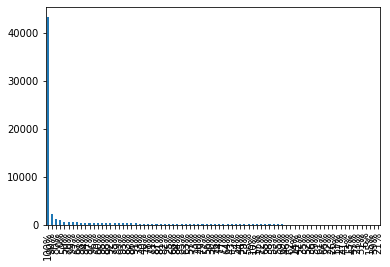

In [21]:
price['host_response_rate'].value_counts().plot(kind='bar')

In [22]:
price['host_response_rate'] = price['host_response_rate'].str.strip('%')

In [23]:
price['host_response_rate'].fillna(100, inplace = True)
 # as the mode of the column is 100 and more than 60% of the data holds the value 100

In [24]:
price['host_response_rate'] = price['host_response_rate'].astype(int)

In [25]:
price['host_response_rate'] = price['host_response_rate'].divide(100)

In [26]:
price['host_response_rate']

0        1.00
1        1.00
2        1.00
3        1.00
4        1.00
5        1.00
6        1.00
7        1.00
8        1.00
9        1.00
10       1.00
11       1.00
12       1.00
13       1.00
14       1.00
15       1.00
16       1.00
17       1.00
18       0.71
19       1.00
20       1.00
21       1.00
22       1.00
23       1.00
24       1.00
25       1.00
26       1.00
27       1.00
28       1.00
29       0.68
         ... 
74081    1.00
74082    1.00
74083    1.00
74084    1.00
74085    1.00
74086    1.00
74087    1.00
74088    0.90
74089    0.00
74090    1.00
74091    0.70
74092    0.90
74093    1.00
74094    1.00
74095    1.00
74096    1.00
74097    1.00
74098    1.00
74099    1.00
74100    1.00
74101    1.00
74102    1.00
74103    1.00
74104    1.00
74105    0.75
74106    1.00
74107    1.00
74108    1.00
74109    1.00
74110    1.00
Name: host_response_rate, Length: 74111, dtype: float64

In [27]:
price.head()

,log_price,property_type,room_type,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,host_identity_verified,host_response_rate,instant_bookable,number_of_reviews,review_scores_rating,bedrooms,beds
0,5.010635,Apartment,Entire home/apt,3,1.0,Real Bed,strict,True,NYC,t,1.0,f,2,100.0,1.0,1.0
1,5.129899,Apartment,Entire home/apt,7,1.0,Real Bed,strict,True,NYC,f,1.0,t,6,93.0,3.0,3.0
2,4.976734,Apartment,Entire home/apt,5,1.0,Real Bed,moderate,True,NYC,t,1.0,t,10,92.0,1.0,3.0
3,6.620073,House,Entire home/apt,4,1.0,Real Bed,flexible,True,SF,t,1.0,f,0,0.0,2.0,2.0
4,4.744932,Apartment,Entire home/apt,2,1.0,Real Bed,moderate,True,DC,t,1.0,t,4,40.0,0.0,1.0


In [28]:
room=pd.get_dummies(price['room_type'],columns='room_type',prefix='room_type')
bed=pd.get_dummies(price['bed_type'],columns='bed_type',prefix='bed_type')
city=pd.get_dummies(price['city'],columns='city',prefix='city')
price['cleaning_fee'] = price['cleaning_fee'].astype(int)
policy=pd.get_dummies(price['cancellation_policy'],columns='cancellation_policy',prefix='cancellation_policy')
price[['host_identity_verified']]= price['host_identity_verified'].map({'f':0, 't':1})
price[['instant_bookable']]= price['instant_bookable'].map({'f':0, 't':1})

In [29]:
price.head()

,log_price,property_type,room_type,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,host_identity_verified,host_response_rate,instant_bookable,number_of_reviews,review_scores_rating,bedrooms,beds
0,5.010635,Apartment,Entire home/apt,3,1.0,Real Bed,strict,1,NYC,1,1.0,0,2,100.0,1.0,1.0
1,5.129899,Apartment,Entire home/apt,7,1.0,Real Bed,strict,1,NYC,0,1.0,1,6,93.0,3.0,3.0
2,4.976734,Apartment,Entire home/apt,5,1.0,Real Bed,moderate,1,NYC,1,1.0,1,10,92.0,1.0,3.0
3,6.620073,House,Entire home/apt,4,1.0,Real Bed,flexible,1,SF,1,1.0,0,0,0.0,2.0,2.0
4,4.744932,Apartment,Entire home/apt,2,1.0,Real Bed,moderate,1,DC,1,1.0,1,4,40.0,0.0,1.0


In [30]:
price=pd.concat([price, room, bed, city, policy], axis=1)
price.drop(['room_type', 'bed_type', 'cancellation_policy', 'city'],axis=1,inplace= True)

In [31]:
price['property_type'].value_counts()

Apartment             49003
House                 16511
Condominium            2658
Townhouse              1692
Loft                   1244
Other                   607
Guesthouse              498
Bed & Breakfast         462
Bungalow                366
Villa                   179
Dorm                    142
Guest suite             123
Camper/RV                94
Timeshare                77
Cabin                    72
In-law                   71
Hostel                   70
Boutique hotel           69
Boat                     65
Serviced apartment       21
Tent                     18
Castle                   13
Vacation home            11
Yurt                      9
Hut                       8
Treehouse                 7
Chalet                    6
Earth House               4
Tipi                      3
Cave                      2
Train                     2
Lighthouse                1
Casa particular           1
Parking Space             1
Island                    1
Name: property_type,

Grouped the property type of less values into others as the number of unique values are high.

In [32]:


price['property_type'] = price['property_type'].replace(['Villa', 'Dorm', 'Guest suite', 'Camper/RV','Timeshare', 'Boutique hotel','Hostel',
       'In-law', 'Boat', 'Serviced apartment', 'Castle', 'Cabin',
       'Treehouse', 'Tipi', 'Vacation home', 'Tent', 'Hut',
       'Casa particular', 'Chalet', 'Yurt', 'Earth House',
       'Parking Space', 'Train', 'Cave', 'Lighthouse', 'Island'], 'Other')

In [33]:
price['property_type'].value_counts()

Apartment          49003
House              16511
Condominium         2658
Townhouse           1692
Other               1677
Loft                1244
Guesthouse           498
Bed & Breakfast      462
Bungalow             366
Name: property_type, dtype: int64

In [34]:
prop=pd.get_dummies(price['property_type'],columns='property_type',prefix='property_type')

In [35]:
price=pd.concat([price, prop], axis=1)

In [36]:
price.drop(['property_type'],axis=1,inplace= True)

In [37]:
price.head()

,log_price,accommodates,bathrooms,cleaning_fee,host_identity_verified,host_response_rate,instant_bookable,number_of_reviews,review_scores_rating,bedrooms,...,cancellation_policy_super_strict_60,property_type_Apartment,property_type_Bed & Breakfast,property_type_Bungalow,property_type_Condominium,property_type_Guesthouse,property_type_House,property_type_Loft,property_type_Other,property_type_Townhouse
0,5.010635,3,1.0,1,1,1.0,0,2,100.0,1.0,...,0,1,0,0,0,0,0,0,0,0
1,5.129899,7,1.0,1,0,1.0,1,6,93.0,3.0,...,0,1,0,0,0,0,0,0,0,0
2,4.976734,5,1.0,1,1,1.0,1,10,92.0,1.0,...,0,1,0,0,0,0,0,0,0,0
3,6.620073,4,1.0,1,1,1.0,0,0,0.0,2.0,...,0,0,0,0,0,0,1,0,0,0
4,4.744932,2,1.0,1,1,1.0,1,4,40.0,0.0,...,0,1,0,0,0,0,0,0,0,0


In [38]:
price.shape

(74111, 39)

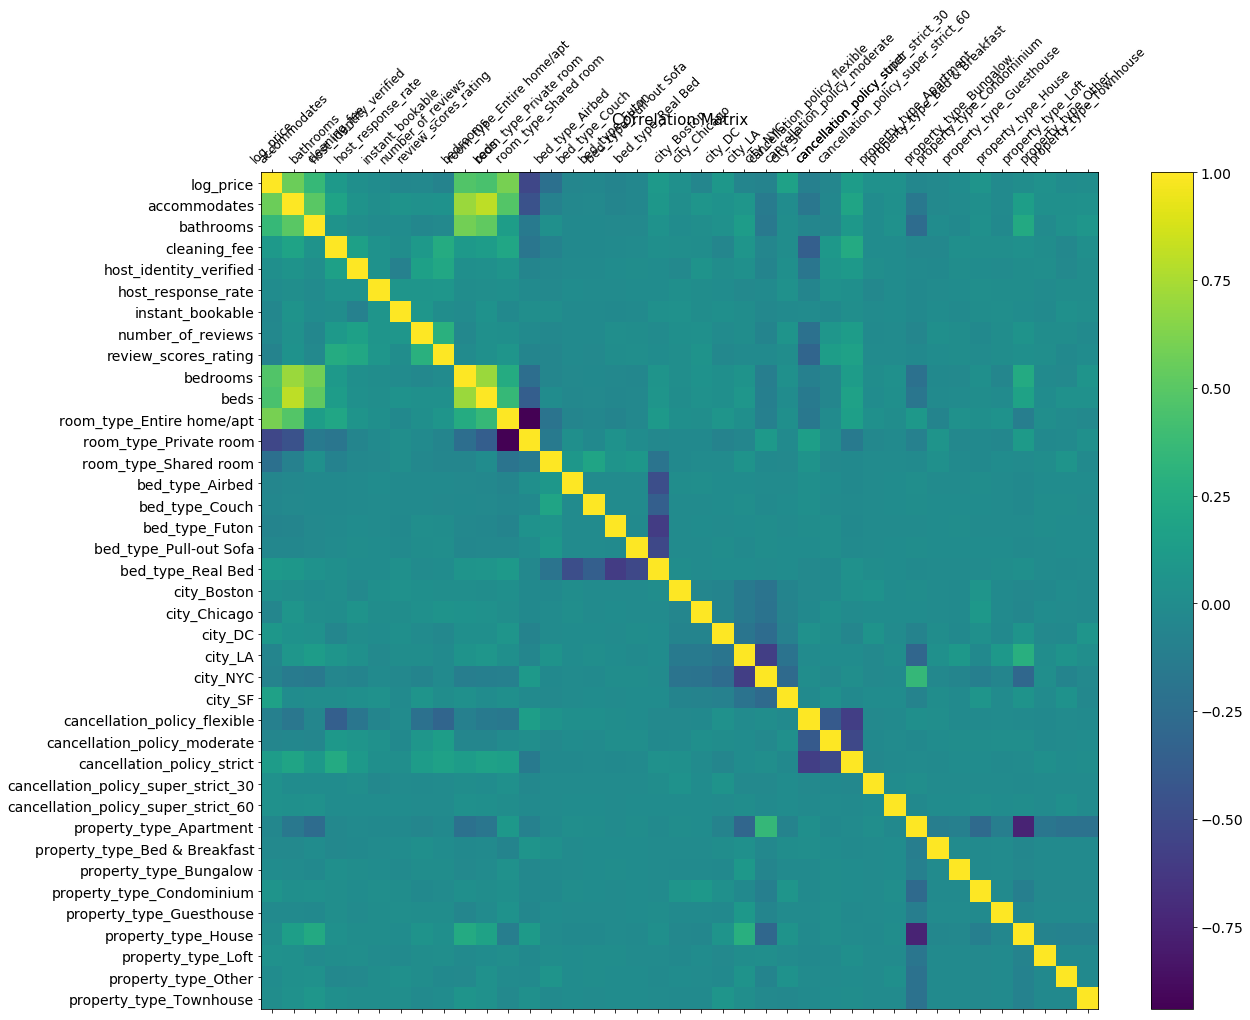

In [39]:
f = plt.figure(figsize=(19, 15))
plt.matshow(price.corr(), fignum=f.number)
plt.xticks(range(price.shape[1]), price.columns, fontsize=12, rotation=45)
plt.yticks(range(price.shape[1]), price.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=15);

In [40]:
np.random.seed(32)

In [41]:
import random

In [42]:
df = price.sample(5000) 
# we are taking the sample of the entire data as there is 74111 instances as it is taking alot of time in running the models.

In [43]:
X = df.drop('log_price', 1).values

In [44]:
y = df['log_price'].values

In [45]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [46]:
X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.2)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

# Bagging with Lasso

In [47]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import BaggingRegressor
from  sklearn.linear_model import Lasso
param_grid_lasso_bag = {'n_estimators':[100, 200, 300, 400, 500],
                       'max_samples': [50,100,200,250,400,450]}
print(param_grid_lasso_bag)

grid_search_lasso_bag = GridSearchCV((BaggingRegressor(Lasso(0.001), bootstrap=True, random_state=0, oob_score=True)), param_grid_lasso_bag, cv=5, scoring = 'neg_mean_squared_error')
grid_search_lasso_bag.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search_lasso_bag.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_lasso_bag.best_score_))

{'n_estimators': [100, 200, 300, 400, 500], 'max_samples': [50, 100, 200, 250, 400, 450]}
Best parameters: {'max_samples': 450, 'n_estimators': 100}
Best cross-validation score: -0.23


In [48]:
lasso_reg = Lasso(0.001)
bag_reg_lasso = BaggingRegressor(lasso_reg, n_estimators=100, max_samples=450, bootstrap=True, random_state=0, oob_score=True)

bag_reg_lasso.fit(X_train, y_train)
y_pred_bag_reg_lasso = bag_reg_lasso.predict(X_test)

In [49]:
y_pred_train_bag_lasso = cross_val_score(BaggingRegressor(lasso_reg, n_estimators=100, max_samples=450, bootstrap=True, random_state=0, oob_score=True), X_train, y_train, cv = 5)
y_pred_train_bag_lasso_mean = y_pred_train_bag_lasso.mean()
print("average train score: ", y_pred_train_bag_lasso_mean)

y_pred_test_bag_lasso = cross_val_score(BaggingRegressor(lasso_reg, n_estimators=100, max_samples=450, bootstrap=True, random_state=0, oob_score=True),X_test, y_test, cv = 5)
y_pred_test_bag_lasso_mean = y_pred_test_bag_lasso.mean()
print("average test score: ", y_pred_test_bag_lasso_mean)

average train score:  0.5726610065316923
average test score:  0.5258752784892529


In [50]:
print(bag_reg_lasso.score(X_train, y_train))
print(bag_reg_lasso.score(X_test, y_test))

0.5826059423380407
0.5434156849914404


In [51]:
from sklearn.metrics import mean_squared_error
from math import sqrt
mse = mean_squared_error(y_test, bag_reg_lasso.predict(X_test))
rmse = sqrt(mse)
print('MSE: %f' % mse)
print('RMSE: %f' % rmse)

MSE: 0.243910
RMSE: 0.493872


# Bagging with Ridge

In [52]:
from  sklearn.linear_model import Ridge
param_grid_ridge_bag = {'n_estimators':[100, 200, 300, 400, 500],
                       'max_samples': [50,100,200,250,400,450]}
print(param_grid_ridge_bag)

grid_search_ridge_bag = GridSearchCV((BaggingRegressor(Ridge(100), bootstrap=True, random_state=0, oob_score=True)), param_grid_ridge_bag, cv=5, scoring = 'neg_mean_squared_error')
grid_search_ridge_bag.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search_ridge_bag.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_ridge_bag.best_score_))

{'n_estimators': [100, 200, 300, 400, 500], 'max_samples': [50, 100, 200, 250, 400, 450]}
Best parameters: {'max_samples': 450, 'n_estimators': 100}
Best cross-validation score: -0.23


In [53]:
from  sklearn.linear_model import Ridge

ridge_reg = Ridge(100)
bag_reg_ridge = BaggingRegressor(ridge_reg, n_estimators=100, max_samples=450, bootstrap=True, random_state=0, oob_score=True)

bag_reg_ridge.fit(X_train, y_train)
y_pred_bag_reg_ridge = bag_reg_ridge.predict(X_test)

In [54]:
y_pred_train_bag_ridge = cross_val_score(BaggingRegressor(ridge_reg, n_estimators=100, max_samples=450, bootstrap=True, random_state=0, oob_score=True), X_train, y_train, cv = 5)
y_pred_train_bag_ridge_mean = y_pred_train_bag_ridge.mean()
print("average train score: ", y_pred_train_bag_ridge_mean)

y_pred_test_bag_ridge = cross_val_score(BaggingRegressor(ridge_reg, n_estimators=100, max_samples=450, bootstrap=True, random_state=0, oob_score=True),X_test, y_test, cv = 5)
y_pred_test_bag_ridge_mean = y_pred_test_bag_ridge.mean()
print("average test score: ", y_pred_test_bag_ridge_mean)

average train score:  0.5646215618863383
average test score:  0.5217417921155644


In [55]:

print(bag_reg_ridge.score(X_train, y_train))
print(bag_reg_ridge.score(X_test, y_test))

0.5724652639630691
0.5296123701445037


In [56]:

mse = mean_squared_error(y_test, bag_reg_ridge.predict(X_test))
rmse = sqrt(mse)
print('MSE: %f' % mse)
print('RMSE: %f' % rmse)

MSE: 0.251283
RMSE: 0.501282


# Pasting with Lasso

In [57]:
from  sklearn.linear_model import Lasso
param_grid_lasso_paste = {'n_estimators':[100, 200, 300, 400, 500],
                       'max_samples': [50,100,200,250,400,450]}
print(param_grid_lasso_paste)

grid_search_lasso_paste = GridSearchCV((BaggingRegressor(Lasso(0.001), bootstrap=False, random_state=0, oob_score=False)), param_grid_lasso_paste, cv=5, scoring = 'neg_mean_squared_error')
grid_search_lasso_paste.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search_lasso_paste.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_lasso_paste.best_score_))

{'n_estimators': [100, 200, 300, 400, 500], 'max_samples': [50, 100, 200, 250, 400, 450]}
Best parameters: {'max_samples': 450, 'n_estimators': 200}
Best cross-validation score: -0.23


In [58]:
lasso_reg = Lasso(0.001)
paste_reg_lasso = BaggingRegressor(lasso_reg, n_estimators=200, max_samples=450, bootstrap=False, random_state=0, oob_score=False)

paste_reg_lasso.fit(X_train, y_train)
y_pred_paste_reg_lasso = paste_reg_lasso.predict(X_test)

In [59]:
y_pred_train_paste_lasso = cross_val_score(BaggingRegressor(lasso_reg, n_estimators=200, max_samples=450, bootstrap=False, random_state=0, oob_score=False), X_train, y_train, cv = 5)
y_pred_train_paste_lasso_mean = y_pred_train_paste_lasso.mean()
print("average train score: ", y_pred_train_paste_lasso_mean)

y_pred_test_paste_lasso = cross_val_score(BaggingRegressor(lasso_reg, n_estimators=200, max_samples=450, bootstrap=False, random_state=0, oob_score=False),X_test, y_test, cv = 5)
y_pred_test_paste_lasso_mean = y_pred_test_paste_lasso.mean()
print("average test score: ", y_pred_test_paste_lasso_mean)

average train score:  0.5727288722999825
average test score:  0.5264840211683851


In [60]:
print(paste_reg_lasso.score(X_train, y_train))
print(paste_reg_lasso.score(X_test, y_test))

0.5825300038647389
0.5457479258290653


In [61]:

mse = mean_squared_error(y_test, paste_reg_lasso.predict(X_test))
rmse = sqrt(mse)
print('MSE: %f' % mse)
print('RMSE: %f' % rmse)

MSE: 0.242664
RMSE: 0.492609


# Pasting with Ridge

In [62]:
param_grid_ridge_paste = {'n_estimators':[100, 200, 300, 400, 500],
                       'max_samples': [50,100,200,250,400,450]}
print(param_grid_ridge_paste)

grid_search_ridge_paste = GridSearchCV((BaggingRegressor(Ridge(100), bootstrap=False, random_state=0, oob_score=False)), param_grid_ridge_paste, cv=5, scoring = 'neg_mean_squared_error')
grid_search_ridge_paste.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search_ridge_paste.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_ridge_paste.best_score_))

{'n_estimators': [100, 200, 300, 400, 500], 'max_samples': [50, 100, 200, 250, 400, 450]}
Best parameters: {'max_samples': 450, 'n_estimators': 400}
Best cross-validation score: -0.23


In [63]:

ridge_reg = Ridge(100)
paste_reg_ridge = BaggingRegressor(ridge_reg, n_estimators=400, max_samples=450, bootstrap=False, random_state=0, oob_score=False)

paste_reg_ridge.fit(X_train, y_train)
y_pred_paste_reg_ridge = paste_reg_ridge.predict(X_test)
                                   

In [64]:
y_pred_train_paste_ridge = cross_val_score(BaggingRegressor(ridge_reg, n_estimators=400, max_samples=450, bootstrap=False, random_state=0, oob_score=False), X_train, y_train, cv = 5)
y_pred_train_paste_ridge_mean = y_pred_train_paste_ridge.mean()
print("average train score: ", y_pred_train_paste_ridge_mean)

y_pred_test_paste_ridge = cross_val_score(BaggingRegressor(ridge_reg, n_estimators=400, max_samples=450, bootstrap=False, random_state=0, oob_score=False),X_test, y_test, cv = 5)
y_pred_test_paste_ridge_mean = y_pred_test_paste_ridge.mean()
print("average test score: ", y_pred_test_paste_ridge_mean)

average train score:  0.5646559404971183
average test score:  0.5225748978370194


In [65]:
print(paste_reg_ridge.score(X_train, y_train))
print(paste_reg_ridge.score(X_test, y_test))

0.5726169024156853
0.5307759952890133


In [66]:
mse = mean_squared_error(y_test, paste_reg_ridge.predict(X_test))
rmse = sqrt(mse)
print('MSE: %f' % mse)
print('RMSE: %f' % rmse)

MSE: 0.250662
RMSE: 0.500661


# AdaBoosting with Lasso

In [67]:
from sklearn.ensemble import AdaBoostRegressor
param_grid_lasso_ada = {'n_estimators':[100, 200, 300, 400, 500],
                       'learning_rate': [0.1, 0.2, 0.5, 1, 10]}
print(param_grid_lasso_ada)

grid_search_lasso_ada = GridSearchCV((AdaBoostRegressor(Lasso(0.001))), param_grid_lasso_ada, cv=5, scoring = 'neg_mean_squared_error')
grid_search_lasso_ada.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search_lasso_ada.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_lasso_ada.best_score_))

{'n_estimators': [100, 200, 300, 400, 500], 'learning_rate': [0.1, 0.2, 0.5, 1, 10]}
Best parameters: {'learning_rate': 0.1, 'n_estimators': 400}
Best cross-validation score: -0.24


In [68]:

ada_reg_lasso = AdaBoostRegressor(Lasso(0.001), n_estimators=400, learning_rate=0.1, random_state=0)
ada_reg_lasso.fit(X_train, y_train)
y_pred_ada_reg_lasso = ada_reg_lasso.predict(X_test)

In [69]:
y_pred_train_ada_lasso = cross_val_score(AdaBoostRegressor(Lasso(0.001), n_estimators=400, learning_rate=0.1, random_state=0), X_train, y_train, cv = 5)
y_pred_train_ada_lasso_mean = y_pred_train_ada_lasso.mean()
print("average train score: ", y_pred_train_ada_lasso_mean)

y_pred_test_ada_lasso = cross_val_score(AdaBoostRegressor(Lasso(0.001), n_estimators=400, learning_rate=0.1, random_state=0),X_test, y_test, cv = 5)
y_pred_test_ada_lasso_mean = y_pred_test_ada_lasso.mean()
print("average test score: ", y_pred_test_ada_lasso_mean)

average train score:  0.550968339026997
average test score:  0.4727641666551007


In [70]:
print(ada_reg_lasso.score(X_train, y_train))
print(ada_reg_lasso.score(X_test, y_test))

0.5638332564056466
0.5419061878632847


In [71]:

mse = mean_squared_error(y_test, ada_reg_lasso.predict(X_test))
rmse = sqrt(mse)
print('MSE: %f' % mse)
print('RMSE: %f' % rmse)

MSE: 0.244716
RMSE: 0.494688


# AdaBoosting with Ridge

In [72]:
param_grid_ridge_ada = {'n_estimators':[100, 200, 300, 400, 500],
                       'learning_rate': [0.1, 0.2, 0.5, 1, 10]}
print(param_grid_ridge_ada)

grid_search_ridge_ada = GridSearchCV((AdaBoostRegressor(Ridge(100))), param_grid_ridge_ada, cv=5, scoring = 'neg_mean_squared_error')
grid_search_ridge_ada.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search_ridge_ada.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_ridge_ada.best_score_))

{'n_estimators': [100, 200, 300, 400, 500], 'learning_rate': [0.1, 0.2, 0.5, 1, 10]}
Best parameters: {'learning_rate': 0.5, 'n_estimators': 500}
Best cross-validation score: -0.24


In [73]:
ada_reg_ridge = AdaBoostRegressor(Ridge(100), n_estimators=100, learning_rate=0.5, random_state=0)
ada_reg_ridge.fit(X_train, y_train)
y_pred_ada_reg_ridge = ada_reg_ridge.predict(X_test)

In [74]:
y_pred_train_ada_ridge = cross_val_score(AdaBoostRegressor(Ridge(100), n_estimators=100, learning_rate=0.5, random_state=0), X_train, y_train, cv = 5)
y_pred_train_ada_ridge_mean = y_pred_train_ada_ridge.mean()
print("average train score: ", y_pred_train_ada_ridge_mean)

y_pred_test_ada_ridge = cross_val_score(AdaBoostRegressor(Ridge(100), n_estimators=100, learning_rate=0.5, random_state=0),X_test, y_test, cv = 5)
y_pred_test_ada_ridge_mean = y_pred_test_ada_ridge.mean()
print("average test score: ", y_pred_test_ada_ridge_mean)

average train score:  0.5517769272427595
average test score:  0.4824861876112999


In [75]:
print(ada_reg_ridge.score(X_train, y_train))
print(ada_reg_ridge.score(X_test, y_test))

0.5610681723810598
0.5429545912907446


In [76]:

mse = mean_squared_error(y_test, ada_reg_ridge.predict(X_test))
rmse = sqrt(mse)
print('MSE: %f' % mse)
print('RMSE: %f' % rmse)

MSE: 0.244156
RMSE: 0.494121


# GradientBoosting

In [77]:
from  sklearn.ensemble import GradientBoostingRegressor
param_grid_gradient = {'max_depth':[2,3,5,7,10,20], 
                        'n_estimators':[3,5,7,10,15,25,50,100],
                       'learning_rate': [0.1, 0.2, 0.5, 1, 10]}
print(param_grid_gradient)

grid_search_gradient = GridSearchCV((GradientBoostingRegressor(random_state=42)), param_grid_gradient, cv=5, scoring = 'neg_mean_squared_error')
grid_search_gradient.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search_gradient.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_gradient.best_score_))

{'max_depth': [2, 3, 5, 7, 10, 20], 'n_estimators': [3, 5, 7, 10, 15, 25, 50, 100], 'learning_rate': [0.1, 0.2, 0.5, 1, 10]}
Best parameters: {'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 100}
Best cross-validation score: -0.21


In [78]:
gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=100, learning_rate=0.2, random_state=42)
gbrt.fit(X_train, y_train)
y_pred_gradient = gbrt.predict(X_test)

In [79]:
y_pred_train_gbrt = cross_val_score(GradientBoostingRegressor(max_depth=2, n_estimators=100, learning_rate=0.2, random_state=42), X_train, y_train, cv = 5)
y_pred_train_gbrt_mean = y_pred_train_gbrt.mean()
print("average train score: ", y_pred_train_gbrt_mean)

y_pred_test_gbrt = cross_val_score(GradientBoostingRegressor(max_depth=2, n_estimators=100, learning_rate=0.2, random_state=42),X_test, y_test, cv = 5)
y_pred_test_gbrt_mean = y_pred_test_gbrt.mean()
print("average test score: ", y_pred_test_gbrt_mean)

average train score:  0.6004770774167592
average test score:  0.5409343993519256


In [80]:
print(gbrt.score(X_train, y_train))
print(gbrt.score(X_test, y_test))

0.6379024310228486
0.5825260451944985


In [81]:

mse = mean_squared_error(y_test, gbrt.predict(X_test))
rmse = sqrt(mse)
print('MSE: %f' % mse)
print('RMSE: %f' % rmse)

MSE: 0.223017
RMSE: 0.472246


# PCA

In [82]:
from sklearn.decomposition import PCA


pca_reg = PCA(n_components=0.95)
#train
pca_reg.fit(X_train)
#transform
X_train_pca = pca_reg.transform(X_train)
X_test_pca = pca_reg.transform(X_test)

In [83]:
X_train_pca.shape

(4000, 29)

In [84]:
X_test_pca.shape

(1000, 29)

# PCA - KNeighborsRegressor

In [85]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict
param_grid_knn = {'n_neighbors':list(range(1,75))}
print(param_grid_knn)
knn = KNeighborsRegressor()
grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring = 'neg_mean_squared_error')
grid_search_knn.fit(X_train_pca, y_train)
print("Best parameters: {}".format(grid_search_knn.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_knn.best_score_))

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74]}
Best parameters: {'n_neighbors': 23}
Best cross-validation score: -0.26


In [86]:
knn_score = cross_val_score(KNeighborsRegressor(23),X_train_pca, y_train, cv = 5,scoring = 'neg_mean_squared_error' )
knn_score_n = -knn_score
print('MSE: ', knn_score_n.mean())

MSE:  0.26118746765233725


In [87]:
y_pred_train = cross_val_score(KNeighborsRegressor(23),X_train_pca, y_train, cv = 5)
y_pred_train_mean = y_pred_train.mean()
print("average train score: ", y_pred_train_mean)

y_pred_test = cross_val_score(KNeighborsRegressor(23),X_test_pca, y_test, cv = 5)
y_pred_test_mean = y_pred_test.mean()
print("average test score: ", y_pred_test_mean)

average train score:  0.5106549369039571
average test score:  0.44768093191132347


In [88]:
knn = KNeighborsRegressor(20)
knn.fit(X_train_pca, y_train)
print(knn.score(X_train_pca, y_train))
print(knn.score(X_test_pca, y_test))

0.5656860754370086
0.4856740620438704


In [89]:
from sklearn.metrics import mean_squared_error
from math import sqrt
mse = mean_squared_error(y_test, knn.predict(X_test_pca))
rmse = sqrt(mse)
print('MSE: %f' % mse)
print('RMSE: %f' % rmse)

MSE: 0.274755
RMSE: 0.524171


# PCA - Linear Regression

In [90]:
from sklearn.linear_model import LinearRegression

lreg = LinearRegression()
lreg_score = cross_val_score(lreg,X_train_pca, y_train, cv = 5,scoring = 'neg_mean_squared_error' )
lreg_score
lreg_score_n = -lreg_score
lreg_score_n.mean()

0.8737570684082427

In [91]:
y_pred_train = cross_val_score(LinearRegression(),X_train_pca, y_train, cv = 5)
y_pred_train_mean = y_pred_train.mean()
print("average train score: ", y_pred_train_mean)

y_pred_test = cross_val_score(LinearRegression(),X_test_pca, y_test, cv = 5)
y_pred_test_mean = y_pred_test.mean()
print("average test score: ", y_pred_test_mean)

average train score:  -0.5901698490765903
average test score:  0.4502972570162022


In [92]:
lreg = LinearRegression()
lreg.fit(X_train_pca, y_train)
print(lreg.score(X_train_pca, y_train))
print(lreg.score(X_test_pca, y_test))

0.5633147093111108
0.5234935079236536


In [93]:
from sklearn.metrics import mean_squared_error
from math import sqrt
mse = mean_squared_error(y_test, lreg.predict(X_test_pca))
rmse = sqrt(mse)
print('MSE: %f' % mse)
print('RMSE: %f' % rmse)

MSE: 0.254552
RMSE: 0.504532


# PCA - Polynomial Regression

In [94]:
from  sklearn.preprocessing  import PolynomialFeatures
for n in range(1,5):
    polynomial = PolynomialFeatures(n)
    X_train_polynomial = polynomial.fit_transform(X_train_pca)
    lreg.fit(X_train_polynomial, y_train)
    scores = cross_val_score(lreg, X_train_polynomial, y_train, cv=5)
    score = scores.mean()
    print(score)
    print(n)

-0.5901698490765822
1
-1.8107755712522636e+20
2
-2.1418872809582305e+25
3
-1.0952867048403323e+22
4


In [95]:
poly1 = PolynomialFeatures(1)
X_train_poly1 = poly1.fit_transform(X_train_pca)
X_test_poly1 = poly1.transform(X_test_pca)
poly_score = cross_val_score(lreg,X_train_poly1, y_train, cv = 5,scoring = 'neg_mean_squared_error' )
poly_score_n = -poly_score
poly_score_n.mean()

0.8737570684082382

In [96]:
y_pred_train = cross_val_score(lreg, X_train_poly1, y_train, cv = 5)
y_pred_train_mean = y_pred_train.mean()
print("average train score: ", y_pred_train_mean)

y_pred_test = cross_val_score(lreg,X_test_poly1, y_test, cv = 5)
y_pred_test_mean = y_pred_test.mean()
print("average test score: ", y_pred_test_mean)

average train score:  -0.5901698490765822
average test score:  0.4502972570162026


In [97]:
poly = PolynomialFeatures(1)
X_train_poly = poly.fit_transform(X_train_pca)
X_test_poly = poly.transform(X_test_pca)
lreg.fit(X_train_poly, y_train)
print(lreg.score(X_train_poly, y_train))
print(lreg.score(X_test_poly, y_test))

0.5633147093111108
0.5234935079236536


In [98]:
from sklearn.metrics import mean_squared_error
from math import sqrt
mse = mean_squared_error(y_test, lreg.predict(X_test_poly))
rmse = sqrt(mse)
print('MSE: %f' % mse)
print('RMSE: %f' % rmse)

MSE: 0.254552
RMSE: 0.504532


# PCA - Ridge

In [99]:
param_grid_ridge = {'alpha':[0.01, 0.1, 1, 10, 100, 1000]}
print(param_grid_ridge)
ridge = Ridge()
grid_search_ridge = GridSearchCV(ridge, param_grid_ridge, cv=5, scoring = 'neg_mean_squared_error')
grid_search_ridge.fit(X_train_pca, y_train)
print("Best parameters: {}".format(grid_search_ridge.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_ridge.best_score_))

{'alpha': [0.01, 0.1, 1, 10, 100, 1000]}
Best parameters: {'alpha': 100}
Best cross-validation score: -0.24


In [100]:
ridge_score = cross_val_score(Ridge(100),X_train_pca, y_train, cv = 5,scoring = 'neg_mean_squared_error' )
ridge_score_n = -ridge_score
ridge_score_n.mean()

0.24143033414818982

In [101]:
y_pred_train = cross_val_score(Ridge(100), X_train_pca, y_train, cv = 5)
y_pred_train_mean = y_pred_train.mean()
print("average train score: ", y_pred_train_mean)

y_pred_test = cross_val_score(Ridge(100),X_test_pca, y_test, cv = 5)
y_pred_test_mean = y_pred_test.mean()
print("average test score: ", y_pred_test_mean)

average train score:  0.5477866418932302
average test score:  0.5104222616265581


In [102]:
ridge = Ridge(100)
ridge.fit(X_train_pca, y_train)
print(ridge.score(X_train_pca, y_train))
print(ridge.score(X_test_pca, y_test))

0.563232610100749
0.5231144250936611


In [103]:
from sklearn.metrics import mean_squared_error
from math import sqrt
mse = mean_squared_error(y_test, ridge.predict(X_test_pca))
rmse = sqrt(mse)
print('MSE: %f' % mse)
print('RMSE: %f' % rmse)

MSE: 0.254755
RMSE: 0.504732


# PCA - Lasso

In [104]:
param_grid_lasso = {'alpha':[0.001, 0.01, 0.1, 1, 10, 100, 1000]}
print(param_grid_lasso)
lasso = Lasso()
grid_search_lasso = GridSearchCV(lasso, param_grid_lasso, cv=5, scoring = 'neg_mean_squared_error')
grid_search_lasso.fit(X_train_pca, y_train)
print("Best parameters: {}".format(grid_search_lasso.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_lasso.best_score_))

{'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
Best parameters: {'alpha': 0.01}
Best cross-validation score: -0.24


In [105]:
lasso_score = cross_val_score(Lasso(0.01),X_train_pca, y_train, cv = 5,scoring = 'neg_mean_squared_error' )
lasso_score_n = -lasso_score
lasso_score_n.mean()

0.23974584839687701

In [106]:
y_pred_train = cross_val_score(Lasso(0.01), X_train_pca, y_train, cv = 5)
y_pred_train_mean = y_pred_train.mean()
print("average train score: ", y_pred_train_mean)

y_pred_test = cross_val_score(Lasso(0.01),X_test_pca, y_test, cv = 5)
y_pred_test_mean = y_pred_test.mean()
print("average test score: ", y_pred_test_mean)

average train score:  0.5508018444521523
average test score:  0.5112792574422154


In [107]:
lasso = Lasso(0.01)
lasso.fit(X_train_pca, y_train)
print(lasso.score(X_train_pca, y_train))
print(lasso.score(X_test_pca, y_test))

0.558777738821365
0.5182812445011237


In [108]:
from sklearn.metrics import mean_squared_error
from math import sqrt
mse = mean_squared_error(y_test, lasso.predict(X_test_pca))
rmse = sqrt(mse)
print('MSE: %f' % mse)
print('RMSE: %f' % rmse)

MSE: 0.257337
RMSE: 0.507283


# PCA - LinearSVR

In [109]:
from  sklearn.svm import LinearSVR
param_grid_svr = {'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000],
             'epsilon': [0.001, 0.01, 0.1, 1, 10, 100]}
print(param_grid_svr)
svr = LinearSVR()
grid_search_svr = GridSearchCV(svr, param_grid_svr, cv=5, scoring = 'neg_mean_squared_error')
grid_search_svr.fit(X_train_pca, y_train)
print("Best parameters: {}".format(grid_search_svr.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_svr.best_score_))

{'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'epsilon': [0.001, 0.01, 0.1, 1, 10, 100]}
Best parameters: {'C': 0.01, 'epsilon': 0.1}
Best cross-validation score: -0.25


In [110]:
lsvr_score = cross_val_score(LinearSVR(C = 0.01, epsilon = 0.1),X_train_pca, y_train, cv = 5,scoring = 'neg_mean_squared_error' )
lsvr_score_n = -lsvr_score
lsvr_score_n.mean()

0.25096568971365724

In [111]:
y_pred_train = cross_val_score(LinearSVR(C = 0.01, epsilon = 0.1), X_train_pca, y_train, cv = 5)
y_pred_train_mean = y_pred_train.mean()
print("average train score: ", y_pred_train_mean)

y_pred_test = cross_val_score(LinearSVR(C = 0.01, epsilon = 0.1),X_test_pca, y_test, cv = 5)
y_pred_test_mean = y_pred_test.mean()
print("average test score: ", y_pred_test_mean)

average train score:  0.5298904205026783
average test score:  0.16236956903237937


In [112]:
lsvr = LinearSVR(C = 0.01, epsilon = 0.1)
lsvr.fit(X_train_pca, y_train)
print(lsvr.score(X_train_pca, y_train))
print(lsvr.score(X_test_pca, y_test))

0.5440668589795767
0.4874092297301194


In [113]:
from sklearn.metrics import mean_squared_error
from math import sqrt
mse = mean_squared_error(y_test, lsvr.predict(X_test_pca))
rmse = sqrt(mse)
print('MSE: %f' % mse)
print('RMSE: %f' % rmse)

MSE: 0.273828
RMSE: 0.523286


# PCA - SVR with RBF Kernel

In [114]:
from  sklearn.svm import SVR
param_grid_rbf = {'C':[0.001, 0.01, 0.1, 1, 10, 100],
             'epsilon': [0.001, 0.01, 0.1, 1, 10]}
print(param_grid_rbf)
svr_rbf = SVR(kernel = 'rbf')
grid_search_rbf = GridSearchCV(svr_rbf, param_grid_rbf, cv=5, scoring = 'neg_mean_squared_error')
grid_search_rbf.fit(X_train_pca, y_train)
print("Best parameters: {}".format(grid_search_rbf.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_rbf.best_score_))

{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'epsilon': [0.001, 0.01, 0.1, 1, 10]}
Best parameters: {'C': 1, 'epsilon': 0.1}
Best cross-validation score: -0.25


In [115]:
rbf_svr_score = cross_val_score(SVR(kernel = 'rbf', C = 1, epsilon = 0.1),X_train_pca, y_train, cv = 5,scoring = 'neg_mean_squared_error' )
rbf_svr_score_n = -rbf_svr_score
rbf_svr_score_n.mean()

0.25105767904713777

In [116]:
y_pred_train = cross_val_score(SVR(kernel = 'rbf', C = 1, epsilon = 0.1), X_train_pca, y_train, cv = 5)
y_pred_train_mean = y_pred_train.mean()
print("average train score: ", y_pred_train_mean)

y_pred_test = cross_val_score(SVR(kernel = 'rbf', C = 1, epsilon = 0.1),X_test_pca, y_test, cv = 5)
y_pred_test_mean = y_pred_test.mean()
print("average test score: ", y_pred_test_mean)

average train score:  0.5295179440787552
average test score:  0.48906086929168574


In [117]:
svr_rbf = SVR(kernel = 'rbf', C = 1, epsilon = 0.1)
svr_rbf.fit(X_train_pca, y_train)
print(svr_rbf.score(X_train_pca, y_train))
print(svr_rbf.score(X_test_pca, y_test))

0.6727334653096604
0.532239458232368


In [118]:
from sklearn.metrics import mean_squared_error
from math import sqrt
mse = mean_squared_error(y_test, svr_rbf.predict(X_test_pca))
rmse = sqrt(mse)
print('MSE: %f' % mse)
print('RMSE: %f' % rmse)

MSE: 0.249880
RMSE: 0.499880


# PCA - SVR with Poly Kernel

In [119]:
param_grid_poly = {'C':[0.001, 0.01, 0.1, 1, 10, 100],
             'epsilon': [0.001, 0.01, 0.1, 1.5]}
print(param_grid_poly)
svr_poly = SVR(kernel = 'poly')
grid_search_poly = GridSearchCV(svr_poly, param_grid_poly, cv=5, scoring = 'neg_mean_squared_error')
grid_search_poly.fit(X_train_pca, y_train)
print("Best parameters: {}".format(grid_search_poly.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_poly.best_score_))

{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'epsilon': [0.001, 0.01, 0.1, 1.5]}
Best parameters: {'C': 0.1, 'epsilon': 0.1}
Best cross-validation score: -0.27


In [120]:
poly_svr_score = cross_val_score(SVR(kernel = 'poly', C = 0.1, epsilon = 0.1),X_train_pca, y_train, cv = 5,scoring = 'neg_mean_squared_error' )
poly_svr_score_n = -poly_svr_score
poly_svr_score_n.mean()

0.2736214600108117

In [121]:
y_pred_train = cross_val_score(SVR(kernel = 'poly', C = 0.1, epsilon = 0.1), X_train_pca, y_train, cv = 5)
y_pred_train_mean = y_pred_train.mean()
print("average train score: ", y_pred_train_mean)

y_pred_test = cross_val_score(SVR(kernel = 'poly', C = 0.1, epsilon = 0.1),X_test_pca, y_test, cv = 5)
y_pred_test_mean = y_pred_test.mean()
print("average test score: ", y_pred_test_mean)

average train score:  0.48762111601570657
average test score:  0.3891908656790588


In [122]:
svr_poly = SVR(kernel = 'poly', C = 0.1, epsilon = 0.1)
svr_poly.fit(X_train_pca, y_train)
print(svr_poly.score(X_train_pca, y_train))
print(svr_poly.score(X_test_pca, y_test))

0.6078889859556276
0.49312329008996403


In [123]:
from sklearn.metrics import mean_squared_error
from math import sqrt
mse = mean_squared_error(y_test, svr_poly.predict(X_test_pca))
rmse = sqrt(mse)
print('MSE: %f' % mse)
print('RMSE: %f' % rmse)

MSE: 0.270776
RMSE: 0.520361


# PCA - SVR with Linear Kernel

In [124]:
param_grid_lin = {'C':[0.001, 0.01, 0.1, 1, 10],
             'epsilon': [0.01, 0.1, 1]}
print(param_grid_lin)
svr_lin = SVR(kernel = 'linear')
grid_search_lin = GridSearchCV(svr_lin, param_grid_lin, cv=5, scoring = 'neg_mean_squared_error')
grid_search_lin.fit(X_train_pca, y_train)
print("Best parameters: {}".format(grid_search_lin.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_lin.best_score_))

{'C': [0.001, 0.01, 0.1, 1, 10], 'epsilon': [0.01, 0.1, 1]}
Best parameters: {'C': 0.001, 'epsilon': 0.01}
Best cross-validation score: -0.24


In [125]:
lin_svr_score = cross_val_score(SVR(kernel = 'linear', C = 0.001, epsilon = 0.01),X_train_pca, y_train, cv = 5,scoring = 'neg_mean_squared_error' )
lin_svr_score_n = -lin_svr_score
lin_svr_score_n.mean()

0.2427693212968122

In [126]:
y_pred_train = cross_val_score(SVR(kernel = 'linear', C = 0.001, epsilon = 0.01), X_train_pca, y_train, cv = 5)
y_pred_train_mean = y_pred_train.mean()
print("average train score: ", y_pred_train_mean)

y_pred_test = cross_val_score(SVR(kernel = 'linear', C = 0.001, epsilon = 0.01),X_test_pca, y_test, cv = 5)
y_pred_test_mean = y_pred_test.mean()
print("average test score: ", y_pred_test_mean)

average train score:  0.5452328334112408
average test score:  0.46369698389898434


In [127]:
svr_linear = SVR(kernel = 'linear', C = 0.001, epsilon = 0.01)
svr_linear.fit(X_train_pca, y_train)
print(svr_linear.score(X_train_pca, y_train))
print(svr_linear.score(X_test_pca, y_test))

0.5537361297148542
0.5038445582655462


In [128]:
from sklearn.metrics import mean_squared_error
from math import sqrt
mse = mean_squared_error(y_test, svr_linear.predict(X_test_pca))
rmse = sqrt(mse)
print('MSE: %f' % mse)
print('RMSE: %f' % rmse)

MSE: 0.265049
RMSE: 0.514829


# Neural Network

In [129]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

np.random.seed(0)

In [130]:
model = Sequential()

In [131]:
X_train_deep = np.array(X_train)
y_train_deep = np.array(y_train)

In [132]:
X_train.shape

(4000, 38)

In [133]:
X_test.shape

(1000, 38)

In [134]:
X_train_dl = X_train_deep.reshape(4000, 38)
X_test_dl = X_test.reshape(1000, 38)
X_train_dl = X_train_deep.astype('float32')
X_test_dl = X_test.astype('float32')

In [135]:
model.add(Dense(10, input_dim = 38, activation = 'sigmoid'))
model.add(Dense(5, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [136]:
model.compile(loss = 'mean_squared_error', optimizer = 'sgd', metrics = ['accuracy', 'mse'])

In [137]:
model.fit(X_train_dl, y_train_deep, epochs = 100, batch_size= 20)

Epoch 1/100
4000/4000 [==============================] - 0s 68us/sample - loss: 15.0638 - acc: 0.0000e+00 - mean_squared_error: 15.0638
Epoch 2/100
4000/4000 [==============================] - 0s 41us/sample - loss: 14.8604 - acc: 0.0000e+00 - mean_squared_error: 14.8604
Epoch 3/100
4000/4000 [==============================] - 0s 42us/sample - loss: 14.8503 - acc: 0.0000e+00 - mean_squared_error: 14.8503
Epoch 4/100
4000/4000 [==============================] - 0s 41us/sample - loss: 14.8467 - acc: 0.0000e+00 - mean_squared_error: 14.8467
Epoch 5/100
4000/4000 [==============================] - 0s 56us/sample - loss: 14.8449 - acc: 0.0000e+00 - mean_squared_error: 14.8449
Epoch 6/100
4000/4000 [==============================] - 0s 43us/sample - loss: 14.8437 - acc: 0.0000e+00 - mean_squared_error: 14.8437
Epoch 7/100
4000/4000 [==============================] - 0s 40us/sample - loss: 14.8430 - acc: 0.0000e+00 - mean_squared_error: 14.8430
Epoch 8/100
4000/4000 [=========================

4000/4000 [==============================] - 0s 42us/sample - loss: 14.8399 - acc: 0.0000e+00 - mean_squared_error: 14.8399
Epoch 61/100
4000/4000 [==============================] - 0s 41us/sample - loss: 14.8399 - acc: 0.0000e+00 - mean_squared_error: 14.8399
Epoch 62/100
4000/4000 [==============================] - 0s 41us/sample - loss: 14.8399 - acc: 0.0000e+00 - mean_squared_error: 14.8399
Epoch 63/100
4000/4000 [==============================] - 0s 49us/sample - loss: 14.8399 - acc: 0.0000e+00 - mean_squared_error: 14.8399
Epoch 64/100
4000/4000 [==============================] - 0s 39us/sample - loss: 14.8399 - acc: 0.0000e+00 - mean_squared_error: 14.8399
Epoch 65/100
4000/4000 [==============================] - 0s 37us/sample - loss: 14.8399 - acc: 0.0000e+00 - mean_squared_error: 14.8399
Epoch 66/100
4000/4000 [==============================] - 0s 37us/sample - loss: 14.8399 - acc: 0.0000e+00 - mean_squared_error: 14.8399
Epoch 67/100
4000/4000 [==============================

In [138]:
model.evaluate(X_train_dl, y_train_deep)

4000/4000 [==============================] - 0s 24us/sample - loss: 14.8398 - acc: 0.0000e+00 - mean_squared_error: 14.8398


[14.839803497314453, 0.0, 14.8398]

In [139]:
model.evaluate(X_test_dl, y_test)

1000/1000 [==============================] - 0s 21us/sample - loss: 14.8524 - acc: 0.0000e+00 - mean_squared_error: 14.8524


[14.852378509521484, 0.0, 14.852377]

In [140]:
from sklearn.metrics import mean_squared_error
from math import sqrt
mse = mean_squared_error(y_test, model.predict(X_test_dl))
rmse = sqrt(mse)
print('MSE: %f' % mse)
print('RMSE: %f' % rmse)

MSE: 14.852378
RMSE: 3.853878


# Evaluation Table - Ensemble Models and neural Network

| Models | Average Train Score | Average Test Score | Best_cross_val_score (Average MSE) | MSE | RMSE|Hyperparameters |
|---|---|---|---|---|---|---|
| Bagging with Lasso | 0.5726 | 0.5258 | -0.23 | 0.243910 | 0.493872 | 'max_samples': 450, 'n_estimators': 100 |
| Bagging with Ridge | 0.56462 | 0.5217 | -0.23 | 0.251283 | 0.501282 | 'max_samples': 450, 'n_estimators': 100 |
| Pasting with Ridge | 0.5646 | 0.52257 | -0.23 | 0.250662 | 0.500661 | 'max_samples': 450, 'n_estimators': 400 |
| Pasting with Lasso | 0.57272 | 0.52648 | -0.23 | 0.242664 | 0.492609 | 'max_samples': 450, 'n_estimators': 200 | 
| Ada Boosting with Lasso | 0.5509| 0.4727 | -0.24 | 0.244716 | 0.494688 | 'learning_rate': 0.1, 'n_estimators': 400 | 
| Ada Boosting with Ridge |0.5517  | 0.4824 | -0.24 | 0.244156 | 0.494121 | 'learning_rate': 0.5, 'n_estimators': 100 |  
| Gradient Boosting | 0.6004  | 0.5411  | -0.21 | 0.223017 | 0.472246 | 'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 100 |
| Neural Network |  |  |  | 14.852324 | 3.853871 |  |